Homework 11 Key
====
#### CHE 116: Numerical Methods and Statistics

4/12/2018

----

Homework Requirements:

1. Write all equations in $\LaTeX$
2. Simplify all expressions
2. Put comments in your Python code
3. Explain or show your work
4. Follow the academic honesty guidelines in the syllabus

-----

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

Answer each using Python and Markdown. First, state what type of optimization (2 points), the number of dimensions (1 point), if it's convex (1 points), and if there are bounds or constraints (2 points). Next, write out any constraints or rearrangements of equations in Markdown. For example, if you use root finding you should write out the expression for which you're finding roots (e.g., $x^2 = 4$ becomes $x^2 - 4 = 0$). Solve the problem ( 6 points) and then graph your solution (4 points). **You must make a graph showing a graph of the equation and the otpimum point for each problem** 16 points per problem. You must also print your numerical answer.

### 1\. 

Solve the following equation

$$
\sin x = \sqrt{x} \ln x
$$

### 2\. 

Find the minimum value for this expression: 

$$
x^4 - x^2 - x
$$

### 3\. 

Find the positive root for this expression. Specify bounds in your call to the optimization function

$$
\frac{x^3(1 - x)}{x^2 - x + 2} = \frac{1}{10}
$$

### 4\.

Take $p$ to be a probability. Find the maximum value for the following expression:

$$
p^{8} (1 - p)^{2}
$$

### 5\. 

Solve the following problem where $x$ and $y$ are bounded to lie between $-\pi$ and $\pi$.

$$
\cos 3.1x \sin 5.2y + \frac{(x + y - 2)^2}{250}
$$

The following snippet will plot the function in 3D

```python
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

def fxn_5(x, y):
    return 2 * np.cos(3.1 * x) * np.sin(5.2 * y) + (x + y - 2)**2 / 250
x = np.linspace(- np.pi, np.pi, 100)
y = np.linspace(-np.pi, np.pi, 100)
xx, yy = np.meshgrid(x, y, sparse=True)

z = fxn_5(xx, yy)

plt.contourf(x,y,z, cmap=cm.plasma)
plt.colorbar()
plt.show()

```

### 6\.


Maximize the following equation subject to the following constraints $x_0 > 0$, $x_1 > 0$, $ x_0 + x_1 = 1$. You do not need to plot this.

$$
f(x_0, x_1) = e^{-(x_0 - 4)^2}e^{-(x_1 + 2)^2}
$$


### 7\.

Solve the following system of equations. Remember that if there are multiple solutions, it is non-convex. You do not need to plot this problem

$$
xy - z = 1
$$
$$
x + z = -2
$$
$$
x^2 -y + z = 3
$$

### Answer 1

* root finding
* 1D
* convex
* no bounds/constraints

$$
\sin x - \sqrt{x} \ln x = 0
$$

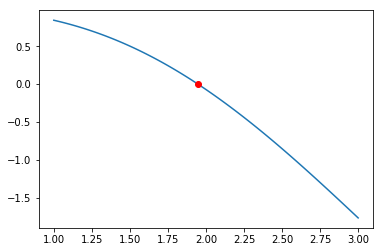

[ 1.94727144]


In [2]:
def fxn_1(x):
    return np.sin(x) - np.sqrt(x) * np.log(x)
result = opt.root(fxn_1, x0=1)

x = np.linspace(1,3, 100)
plt.plot(x, fxn_1(x))
plt.plot(result.x, result.fun, 'ro')
plt.show()
print(result.x)

### Answer 2
* minimization
* 1D
* convex
* no bounds/constraints

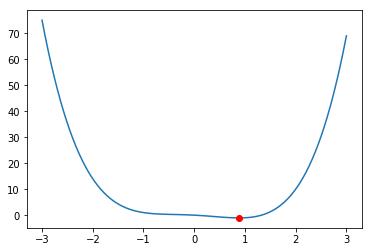

[ 0.88464548]


In [3]:
def fxn_2(x):
    return x**4 - x**2 - x
result = opt.minimize(fxn_2, x0=1)

x = np.linspace(-3,3, 100)
plt.plot(x, fxn_2(x))
plt.plot(result.x, result.fun, 'ro')
plt.show()
print(result.x)

### Answer 3

* root finding
* 1D
* convex
* bounds: $x > 0$

$$
\frac{x^3(1 - x)}{x^2 - x + 2} + \frac{1}{10} = 0
$$

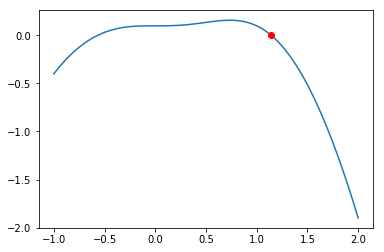

1.1444534038364285


In [5]:
def fxn_3(x):
    return x ** 3 * (1 - x) / (x**2 - x + 2) + 0.1
result = opt.brentq(fxn_3, a=0, b = 100)
# brentq returns root directly
x = np.linspace(-1,2, 100)
plt.plot(x, fxn_3(x))
plt.plot(result, fxn_3(result), 'ro')
plt.show()
print(result)

### Answer 4

* minimization
* 1D
* convex
* bounds: $0 < p < 1$

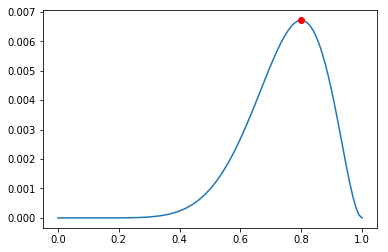

[ 0.7999947]


In [6]:
def fxn_4(p):
    return p**8 * (1 - p)**2
#use lambda here to make it maximization
result = opt.minimize(lambda x: -fxn_4(x), x0=0.5, bounds=[(0, 1)])

x = np.linspace(0,1, 100)
plt.plot(x, fxn_4(x))
#can't use reult.fun, since it's negative of f(x)
plt.plot(result.x, fxn_4(result.x), 'ro')
plt.show()
print(result.x)

### Answer 5
* minimzation
* 2D
* non-convex 
* bounds: $-\pi < x < \pi,\; -\pi < y < \pi$

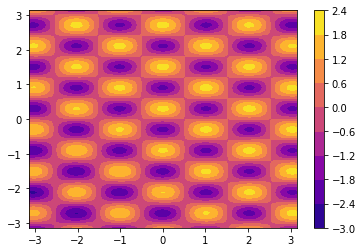

In [31]:
def fxn_5(x, y):
    return 2 * np.cos(x * 3.1) * np.sin(y * 5.2) - (x  + y - 2)**2 / 100
x = np.linspace(-np.pi, np.pi, 100)
y = np.linspace(-np.pi, np.pi, 100)
xx, yy = np.meshgrid(x, y, sparse=True)

z = fxn_5(xx, yy)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

plt.contourf(x,y,z, cmap=cm.plasma)
plt.colorbar()
plt.show()

In [32]:
# tired a few number of iterations, this one worked well
result = opt.basinhopping(lambda x: fxn_5(x[0], x[1]), x0=[0, 0], niter=5000, 
                          minimizer_kwargs={'bounds': [(-np.pi, np.pi), (-np.pi, np.pi)]})
print(result.x)

[-3.047708   -2.11718404]


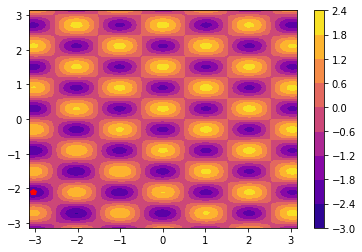

In [33]:
plt.contourf(x,y,z, cmap=cm.plasma)
plt.plot(result.x[0], result.x[1], 'rp')
plt.colorbar()
plt.show()

### Answer 6

* maximize
* 2D
* convex
* bounds: $x_0 > 0$, $x_1 > 0$
* constraints:

$$
x_0 + x_1 - 1 = 0
$$

In [30]:
def fxn_6(x):
    return np.exp(-(x[0] - 4)**2) * np.exp(-(x[1] + 2)**2)
#we use bounds up to 10, to approximate infinity
result = opt.minimize(lambda x: -fxn_6(x), x0=[0.3,0.7], constraints=[{'type':'eq', 'fun': lambda x: x[0] + x[1] - 1}], bounds=[(0,10), (0,10)])         
print(result.x, result.fun)

[ 0.3  0.7] -7.735738309389561e-10


### Answer 7

* root
* 3D
* non-convex
* no bounds/constraints

$$
xy - z - 1 = 0
$$
$$
x + z + 2 = 0
$$
$$
x^2 -y + z - 3 = 0
$$

In [11]:
def fxn_7(v):
    x = v[0]
    y = v[1]
    z = v[2]
    eq1 = x * y - z - 1
    eq2 = x + z + 2
    eq3 = x**2 - y + z - 3
    return [eq1, eq2, eq3]

opt.root(fxn_7, x0=[1, 1, 1])

    fjac: array([[ 0.03720618, -0.25541528, -0.96611528],
       [ 0.9937905 ,  0.11090685,  0.00895115],
       [-0.10486254,  0.96044922, -0.2579557 ]])
     fun: array([  1.33226763e-15,  -4.44089210e-16,  -8.88178420e-16])
 message: 'The solution converged.'
    nfev: 17
     qtf: array([  4.77161711e-11,   1.17816210e-10,  -9.15389525e-13])
       r: array([-3.91519256,  1.0545771 , -0.27112992,  2.42866074, -0.02426211,
        0.97187867])
  status: 1
 success: True
       x: array([ 2.46050487, -1.40642065, -4.46050487])

In [12]:
# try different starting point to see if it's non-convex
opt.root(fxn_7, x0=[-10, 10, 10])

    fjac: array([[-0.65925204,  0.07371802, -0.74829968],
       [-0.74698363, -0.17807854,  0.64054936],
       [ 0.08603608, -0.98125108, -0.1724648 ]])
     fun: array([ -2.47135645e-13,   0.00000000e+00,  -1.91402449e-13])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([  1.43281191e-09,   2.92339266e-10,   5.45881840e-11])
       r: array([ 13.56520342,   1.18018059,  -0.04621884,   0.48855175,
         1.07285541,  -1.21728241])
  status: 1
 success: True
       x: array([-1.69962815, -0.41163601, -0.30037185])

In [13]:
result = opt.root(fxn_7, x0=[-10, 10, 20])

In [14]:
print(result.x)

[-1.69962815 -0.41163601 -0.30037185]
